Este notebook segue o fluxo de trabalho apresentado aqui (https://www.datacamp.com/community/tutorials/scikit-learn-fake-news) onde é utilizado um conjunto de dados previamente marcados como REAL news ou FAKE news.

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
import time

In [2]:
df = pd.read_csv("csvNews.csv")
# Set 'y' 
y = df.label

# Drop the 'label' column
df.drop("label", axis=1)

,text
0,A família Guimarães passou a noite de Natal pe...
1,Uma menina de 11 anos apedrejada ao sair de um...
2,Insatisfeitas com seus partidos com as siglas ...
3,O Instituto Nupal (Núcleo de Pesquisas da Amér...
4,Assassinatos sequestros mortes violentas. Nenh...
5,No Dia do Trabalhador uma notícia especial par...
6,“Por que o povo não está nas ruas?” “Como é qu...
7,Iemanjá está preocupada com a proximidade do A...
8,Após o caso de perseguição e morte do trafican...
9,O líder da milícia de Rio das Pedras Alessandr...


In [3]:
def extractTrainingAndTestData():
    # Make training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.30, random_state=50)
    
    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = extractTrainingAndTestData()

In [5]:
def extractAllTrainingData():
    X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df['text'], y, test_size=0, random_state=50)
    
    return X_train_all, y_train_all

In [6]:
X_train_all, y_train_all = extractAllTrainingData()

In [7]:
def loadStopWordsPT(filename):
    lines = [line.rstrip('\n').strip() for line in open(filename)]
    return lines

In [8]:
def buildCountVectorizerClassifier(X_train, X_test, X_train_all):

    # Initialize the 'count_vectorizer'
    count_vectorizer = CountVectorizer(stop_words=loadStopWordsPT('stop_words_noAccents_pt_plus.txt'), strip_accents="ascii", max_df=0.7)
    
    # Initialize the 'count_vectorizer' for cross validation
    count_vectorizer_all = CountVectorizer(stop_words=loadStopWordsPT('stop_words_noAccents_pt_plus.txt'), strip_accents="ascii", max_df=0.7)
    
    # Fit and transform the training data 
    count_train = count_vectorizer.fit_transform(X_train.values.astype('str'))
    
    # Fit and transform the training data for cross validation
    count_train_all = count_vectorizer_all.fit_transform(X_train_all.values.astype('str'))
    
    # Transform the test set 
    count_test = count_vectorizer.transform(X_test.values.astype('str'))
    
    return count_train, count_test, count_vectorizer, count_train_all

In [9]:
def buildTFIDFVectorizerClassifier(X_train, X_test, X_train_all):

    # Initialize the 'tfidf_vectorizer' 
    tfidf_vectorizer = TfidfVectorizer(stop_words=loadStopWordsPT('stop_words_noAccents_pt_plus.txt'), max_df=0.7, strip_accents="ascii")
    
    # Initialize the 'tfidf_vectorizer' for cross validation
    tfidf_vectorizer_all = TfidfVectorizer(stop_words=loadStopWordsPT('stop_words_noAccents_pt_plus.txt'), max_df=0.7, strip_accents="ascii")

    # Fit and transform the training data 
    tfidf_train = tfidf_vectorizer.fit_transform(X_train.values.astype('str')) 
    
    # Fit and transform the training data for cross validation
    tfidf_train_all = tfidf_vectorizer_all.fit_transform(X_train_all.values.astype('str')) 

    # Transform the test set 
    tfidf_test = tfidf_vectorizer.transform(X_test.values.astype('str'))
    
    return tfidf_train, tfidf_test, tfidf_vectorizer, tfidf_train_all

Método implementado para a plotagem da Confusion Matrix.

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)

In [12]:
def trainModel(model, X_train, Y_train, X_test, y_test):
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)
    return model, pred, score

Plotagem da matriz de confusão

In [13]:
def plotConfMatrix(pred):
    cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
    plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
    plt.show()

Realizando as transformações dos conjuntos de treino e teste, considerando a simples contagem de palavras (CountVectorizer) e os valores considerando o TFIDF (TFIDFVectorizer). As matrizes, considerando estas duas transformações, serão passadas para os modelos para que estes tentem aprender algo útil dos dados.

In [14]:
count_train, count_test, count_vectorizer, count_train_all = buildCountVectorizerClassifier(X_train, X_test, X_train_all)
tfidf_train, tfidf_test, tfidf_vectorizer, tfidf_train_all = buildTFIDFVectorizerClassifier(X_train, X_test, X_train_all)

In [15]:
NB_tfidf = MultinomialNB()
NB_count = MultinomialNB()

linear_PAC_tfidf = PassiveAggressiveClassifier(max_iter=5)
linear_PAC_count = PassiveAggressiveClassifier(max_iter=5)

SVM_tfidf = LinearSVC()
SVM_count = LinearSVC()

In [16]:
model_tfidf_NB, pred_tfidf_NB, score_tfidf_NB = trainModel(NB_tfidf, tfidf_train, y_train, tfidf_test, y_test)
model_count_NB, pred_count_NB, score_count_NB = trainModel(NB_count, count_train, y_train, count_test, y_test)

model_tfidf_pac, pred_tfidf_pac, score_tfidf_pac = trainModel(linear_PAC_tfidf, tfidf_train, y_train, tfidf_test, y_test)
model_count_pac, pred_count_pac, score_count_pac = trainModel(linear_PAC_count, count_train, y_train, count_test, y_test)

model_tfidf_svm, pred_tfidf_svm, score_tfidf_svm = trainModel(SVM_tfidf, tfidf_train, y_train, tfidf_test, y_test)
model_count_svm, pred_count_svm, score_count_svm = trainModel(SVM_count, count_train, y_train, count_test, y_test)


print("accuracy of TFIDF matrix with Naive Bayes:   %0.3f" % score_tfidf_NB)
print("accuracy of COUNT VECTORIZER matrix with Naive Bayes:   %0.3f" % score_count_NB)
print
print("accuracy of TFIDF matrix with Passive Aggressive Classifier (linear):   %0.3f" % score_tfidf_pac)
print("accuracy of COUNT VECTORIZER matrix with Passive Aggressive Classifier (linear):   %0.3f" % score_count_pac)
print
print("accuracy of TFIDF matrix with SVM:   %0.3f" % score_tfidf_svm)
print("accuracy of COUNT VECTORIZER matrix with Passive Aggressive Classifier (linear):   %0.3f" % score_count_svm)


accuracy of TFIDF matrix with Naive Bayes:   0.914
accuracy of COUNT VECTORIZER matrix with Naive Bayes:   0.958

accuracy of TFIDF matrix with Passive Aggressive Classifier (linear):   0.989
accuracy of COUNT VECTORIZER matrix with Passive Aggressive Classifier (linear):   0.969

accuracy of TFIDF matrix with SVM:   0.988
accuracy of COUNT VECTORIZER matrix with Passive Aggressive Classifier (linear):   0.980


TFIDF features using Naive Bayes to learn
Confusion matrix, without normalization


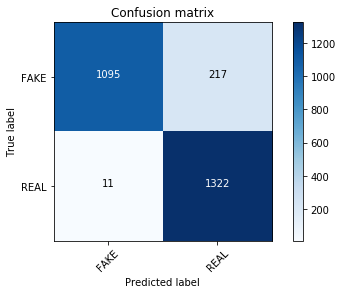

CountVectorizer features using Naive Bayes to learn
Confusion matrix, without normalization


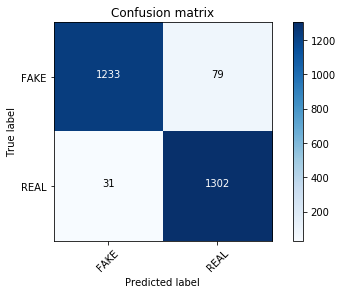

TFIDF features using Passive Aggressive Classifier (linear) to learn
Confusion matrix, without normalization


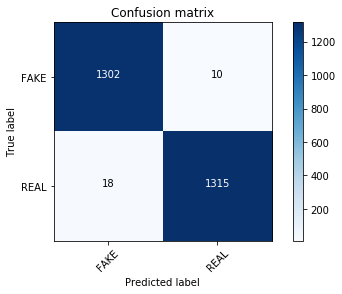

CountVectorizer features using Passive Aggressive Classifier (linear) to learn
Confusion matrix, without normalization


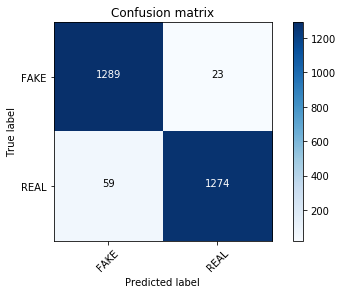

TFIDF features using SVM to learn
Confusion matrix, without normalization


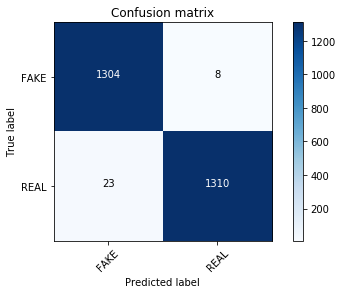

CountVectorizer features using SVM to learn
Confusion matrix, without normalization


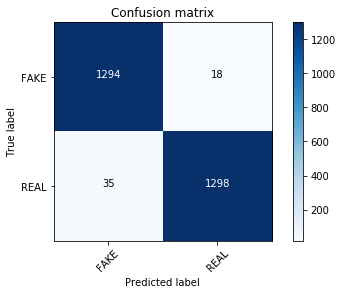

In [17]:
print "TFIDF features using Naive Bayes to learn"
plotConfMatrix(pred_tfidf_NB)
print "CountVectorizer features using Naive Bayes to learn"
plotConfMatrix(pred_count_NB)
print "TFIDF features using Passive Aggressive Classifier (linear) to learn"
plotConfMatrix(pred_tfidf_pac)
print "CountVectorizer features using Passive Aggressive Classifier (linear) to learn"
plotConfMatrix(pred_count_pac)
print "TFIDF features using SVM to learn"
plotConfMatrix(pred_tfidf_svm)
print "CountVectorizer features using SVM to learn"
plotConfMatrix(pred_count_svm)